In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import glob
import os
import cv2
from PIL import Image
from random import shuffle
import keras.layers as kl
import random
import pickle

In [162]:
tf=glob.glob('Downloads/chest_xray/train/*/**')

In [163]:
shuffle(tf)

In [164]:
tf

['Downloads/chest_xray/train\\NORMAL\\NORMAL2-IM-1294-0001.jpeg',
 'Downloads/chest_xray/train\\PNEUMONIA\\person1244_bacteria_3200.jpeg',
 'Downloads/chest_xray/train\\PNEUMONIA\\person846_virus_1491.jpeg',
 'Downloads/chest_xray/train\\NORMAL\\IM-0515-0001.jpeg',
 'Downloads/chest_xray/train\\PNEUMONIA\\person1455_virus_2492.jpeg',
 'Downloads/chest_xray/train\\NORMAL\\NORMAL2-IM-0806-0001.jpeg',
 'Downloads/chest_xray/train\\PNEUMONIA\\person751_bacteria_2654.jpeg',
 'Downloads/chest_xray/train\\PNEUMONIA\\person544_virus_1074.jpeg',
 'Downloads/chest_xray/train\\PNEUMONIA\\person323_virus_656.jpeg',
 'Downloads/chest_xray/train\\PNEUMONIA\\person417_virus_850.jpeg',
 'Downloads/chest_xray/train\\PNEUMONIA\\person257_bacteria_1194.jpeg',
 'Downloads/chest_xray/train\\NORMAL\\NORMAL2-IM-1221-0001.jpeg',
 'Downloads/chest_xray/train\\PNEUMONIA\\person432_virus_881.jpeg',
 'Downloads/chest_xray/train\\NORMAL\\NORMAL2-IM-1130-0001.jpeg',
 'Downloads/chest_xray/train\\PNEUMONIA\\person11

In [165]:
len(tf)

5216

In [166]:
X_train=np.zeros((len(tf),224,224))
Y_train=np.zeros((len(tf)))

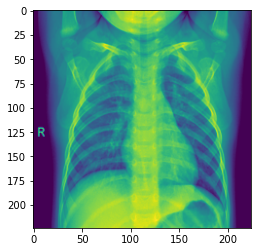

In [167]:
plt.imshow(Image.open(tf[0]).resize((224,224)))

In [168]:
# im=np.asarray(Image.open(tf[1]).resize())
# im=Image.open(tf[1])


In [98]:
for i,file in enumerate(tf):
    im=Image.open(file)
    im=im.convert('L')
    X_train[i,:,:]=im.resize((224,224))

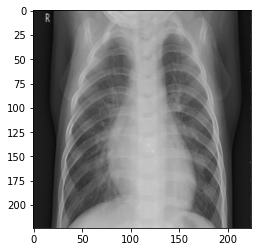

In [101]:
plt.imshow(Image.fromarray(X_train[random.randint(1,5000)]))

In [74]:
for i,file in enumerate(tf):
    if "NORMAL" in file:
        Y_train[i]=0
    elif "bacteria" in file:
        Y_train[i]=1
    elif "virus" in file:
        Y_train[i]=2
Y_train        

array([1., 2., 1., ..., 0., 1., 1.])

In [135]:
model=keras.Sequential()
model.add(kl.Conv2D(32,(3,3),strides=2,padding='Same',activation='relu',input_shape=(224,224,1)))
model.add(kl.MaxPool2D(2,2))
model.add(kl.BatchNormalization())
model.add(kl.Dropout(0.3))
model.add(kl.Conv2D(64,(3,3),strides=1,padding='Same',activation='relu'))
model.add(kl.MaxPool2D(2,2))
model.add(kl.BatchNormalization())
model.add(kl.Conv2D(128,(3,3),strides=1,padding='Same',activation='relu'))
model.add(kl.BatchNormalization())
model.add(kl.Conv2D(256,(3,3),strides=1,padding='Same',activation='relu'))
model.add(kl.MaxPool2D(2,2))
model.add(kl.BatchNormalization())
model.add(kl.Flatten())
model.add(kl.Dropout(0.5))
model.add(kl.Dense(512,activation='relu'))
model.add(kl.Dropout(0.5))
model.add(kl.Dense(3,activation='softmax'))

In [136]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [137]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 112, 112, 32)      320       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
batch_normalization_39 (Batc (None, 56, 56, 32)        128       
_________________________________________________________________
dropout_20 (Dropout)         (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
batch_normalization_40 (Batc (None, 28, 28, 64)      

In [138]:
model

In [134]:
X_train=X_train.reshape((len(X_train),224,224,1))
X_train.shape

(5216, 224, 224, 1)

In [139]:
model.fit(X_train, Y_train,epochs=2,validation_split=0.1)

Epoch 1/2
147/147 [==============================] - 171s 1s/step - loss: 0.0337 - accuracy: 0.9938 - val_loss: 4.7897e-05 - val_accuracy: 1.0000
Epoch 2/2
147/147 [==============================] - 160s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


In [173]:
# model_file='X-Ray_Prediction_model.sav'
# pickle.dump(model,open(model_file,'wb'))

TypeError: cannot pickle '_thread.RLock' object

In [146]:
testf=glob.glob('Downloads/chest_xray/test/*/**')
shuffle(testf)
testf

['Downloads/chest_xray/test\\NORMAL\\NORMAL2-IM-0237-0001.jpeg',
 'Downloads/chest_xray/test\\NORMAL\\NORMAL2-IM-0327-0001.jpeg',
 'Downloads/chest_xray/test\\PNEUMONIA\\person136_bacteria_650.jpeg',
 'Downloads/chest_xray/test\\PNEUMONIA\\person91_bacteria_446.jpeg',
 'Downloads/chest_xray/test\\PNEUMONIA\\person11_virus_38.jpeg',
 'Downloads/chest_xray/test\\PNEUMONIA\\person1616_virus_2802.jpeg',
 'Downloads/chest_xray/test\\PNEUMONIA\\person1674_virus_2890.jpeg',
 'Downloads/chest_xray/test\\PNEUMONIA\\person19_virus_50.jpeg',
 'Downloads/chest_xray/test\\PNEUMONIA\\person147_bacteria_706.jpeg',
 'Downloads/chest_xray/test\\PNEUMONIA\\person146_bacteria_700.jpeg',
 'Downloads/chest_xray/test\\NORMAL\\NORMAL2-IM-0351-0001.jpeg',
 'Downloads/chest_xray/test\\PNEUMONIA\\person147_bacteria_707.jpeg',
 'Downloads/chest_xray/test\\NORMAL\\IM-0011-0001-0002.jpeg',
 'Downloads/chest_xray/test\\NORMAL\\NORMAL2-IM-0241-0001.jpeg',
 'Downloads/chest_xray/test\\NORMAL\\NORMAL2-IM-0219-0001.jpe

In [147]:
X_test=np.zeros((len(testf),224,224))
Y_test=np.zeros((len(testf)))

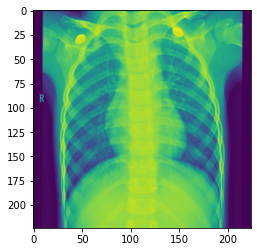

In [151]:
plt.imshow(Image.open(testf[random.randint(1,500)]).resize((224,224)))

In [158]:
for i,file in enumerate(testf):
    im=Image.open(file)
    im=im.convert('L')
    X_test[i,:,:]=im.resize((224,224))

In [160]:
testf

['Downloads/chest_xray/test\\NORMAL\\NORMAL2-IM-0237-0001.jpeg',
 'Downloads/chest_xray/test\\NORMAL\\NORMAL2-IM-0327-0001.jpeg',
 'Downloads/chest_xray/test\\PNEUMONIA\\person136_bacteria_650.jpeg',
 'Downloads/chest_xray/test\\PNEUMONIA\\person91_bacteria_446.jpeg',
 'Downloads/chest_xray/test\\PNEUMONIA\\person11_virus_38.jpeg',
 'Downloads/chest_xray/test\\PNEUMONIA\\person1616_virus_2802.jpeg',
 'Downloads/chest_xray/test\\PNEUMONIA\\person1674_virus_2890.jpeg',
 'Downloads/chest_xray/test\\PNEUMONIA\\person19_virus_50.jpeg',
 'Downloads/chest_xray/test\\PNEUMONIA\\person147_bacteria_706.jpeg',
 'Downloads/chest_xray/test\\PNEUMONIA\\person146_bacteria_700.jpeg',
 'Downloads/chest_xray/test\\NORMAL\\NORMAL2-IM-0351-0001.jpeg',
 'Downloads/chest_xray/test\\PNEUMONIA\\person147_bacteria_707.jpeg',
 'Downloads/chest_xray/test\\NORMAL\\IM-0011-0001-0002.jpeg',
 'Downloads/chest_xray/test\\NORMAL\\NORMAL2-IM-0241-0001.jpeg',
 'Downloads/chest_xray/test\\NORMAL\\NORMAL2-IM-0219-0001.jpe

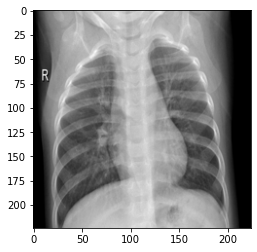

In [157]:
plt.imshow(Image.fromarray(X_test[random.randint(1,500)]))

In [181]:
X_test=X_test/255

In [156]:
for i,file in enumerate(testf):
    if "NORMAL" in file:
        Y_test[i]=0
    elif "bacteria" in file:
        Y_test[i]=1
    elif "virus" in file:
        Y_test[i]=2
Y_test 

array([0., 0., 1., 1., 2., 2., 2., 2., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 2., 2., 2., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       2., 2., 1., 2., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 2.,
       1., 1., 0., 0., 2., 2., 0., 1., 2., 0., 1., 2., 1., 2., 2., 1., 1.,
       1., 0., 0., 2., 0., 0., 1., 1., 2., 1., 0., 2., 2., 1., 0., 1., 2.,
       1., 1., 2., 0., 1., 0., 1., 2., 1., 0., 0., 0., 0., 1., 0., 2., 2.,
       1., 1., 1., 1., 1., 1., 2., 0., 0., 0., 0., 1., 1., 1., 0., 2., 2.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 2., 0., 1., 2., 2.,
       1., 1., 0., 0., 1., 2., 1., 0., 2., 1., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 2., 0., 1., 2., 2., 0., 0., 0., 2., 0., 2., 0., 2.,
       2., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       2., 0., 0., 2., 0., 1., 0., 1., 2., 1., 1., 0., 0., 0., 2., 2., 0.,
       2., 2., 1., 2., 0., 2., 1., 2., 1., 2., 2., 0., 1., 0., 2., 0., 0.,
       1., 1., 0., 1., 1.

In [189]:
y_pre=model.predict(X_test[0].reshape(-1,224,224,1))
print(y_pre)

[[1. 0. 0.]]
